# EDA and Linear Regression with Evaluation Metrics on Diamonds Dataset

I applied Linear Regression on Diamonds Dataset in this notebook. I made a detailed review of the features in the dataset. I explained the Skewness problem and showed its solution. After preparing the dataset, I determined the parameters by applying Hyper-Parameter Optimization on Linear Regression. I examined the results of the model under the title of evaluation metrics and gave information about these metrics. In total, I explained 9 evaluation metrics and showed their calculations.

## Content:

1. [Importing the Necessary Libraries](#1)
1. [Read Datas & Explanation of Features & Information About Datasets](#2)
   1. [Variable Descriptions](#3)
      1. [Univariate Variable Analysis](#4)
         1. [Categorical Variables](#5)
         1. [Numerical Variables](#6)
1. [Basic Data Analysis](#7)    
   1. [Cut - Price](#8)
   1. [Color - Price](#9)
   1. [Clarity - Price](#10)
   1. [Carat - Price](#11)
   1. [Depth - Price](#12)
   1. [Table - Price](#13)
   1. [x - Price](#14)
   1. [y - Price](#15)
   1. [z - Price](#16)
1. [Data Visualization](#17)
1. [Pandas Profiling](#18)
1. [Anomaly Detection](#19)
1. [Skewness](#20)
   1. [Carat](#21)
   1. [Price](#22)
   1. [y](#23)
   1. [z](#24)
1. [Correlation](#25)
1. [One-Hot Encoding](#26)
1. [Train-Test Split](#27)
1. [Linear Regression](#28)
   1. [Hyper-Parameter Optimization](#29)
   1. [Model](#30)
   1. [Evaluation Metrics](#31)
      1. [Explained Variance](#32)
      1. [Max Error](#33)
      1. [Mean Squared Error](#34)
      1. [Mean Absolute Error](#35)
      1. [Mean Absolute Percentage Error](#36)
      1. [Median Absolute Error](#37)
      1. [R Squared](#38)
      1. [Adjusted R Squared](#39)
      1. [Root Mean Squared Error](#40)
1. [Conclusion](#41)   

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a>
# Importing the Necessary Libraries

In [ ]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

import graphviz 

from pandas_profiling import ProfileReport

from scipy.stats import norm, skew, boxcox
from sklearn.model_selection import KFold


from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

from sklearn.model_selection import GridSearchCV, cross_val_score


from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn import metrics


import warnings
warnings.filterwarnings("ignore")

<a id = "2"></a>
# Read Datas & Explanation of Features & Information About Datasets

In [ ]:
dataset = pandas.read_csv('/kaggle/input/diamonds/diamonds.csv')
dataset.sample(10)

In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.drop('Unnamed: 0', axis = 1, inplace = True)

<a id = "3"></a>
## Variable Descriptions

* Carat --> weight of the diamond (0.2--5.01)
* Cut --> Describe cut quality of the diamond. Quality in increasing order Fair, Good, Very Good, Premium, Ideal
* Color --> Color of the diamond, with D being the best and J the worst
* Clarity --> How obvious inclusions are within the diamond:(in order from best to worst, FL = flawless, I3= level 3 inclusions) FL,IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* Depth --> The height of a diamond, measured from the culet to the table, divided by its average girdle diameter
* Table --> The width of the diamond's table expressed as a percentage of its average diameter
* Price --> the price of the diamond
* x --> length mm
* y --> width mm
* z --> depth mm


In [ ]:
dataset.info()

In [ ]:
dataset.describe()

<a id = "4"></a>
### Univariate Variable Analysis

* Categorical Variables: ['cut', 'color', 'clarity']

* Numerical Variables: ['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

<a id = "5"></a>
#### Categorical Variables

In [ ]:
def bar_plot(variable):
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

In [ ]:
categorical = (dataset.dtypes == "object")
categorical_list = list(categorical[categorical].index)

print("Categorical variables:")
print(categorical_list)

In [ ]:
sns.set_style('darkgrid')
for c in categorical_list:
    bar_plot(c)

<a id = "6"></a>
#### Numerical Variables

In [ ]:
numerical_float64 = (dataset.dtypes == "float64")
numerical_float64_list = list(numerical_float64[numerical_float64].index)

print("Numerical variables:")
print(numerical_float64_list)

In [ ]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.histplot(dataset['carat'], color = 'red', kde = True).set_title('carat Interval and Counts')

plt.subplot(3,3,2)
sns.histplot(dataset['depth'], color = 'green', kde = True).set_title('depth Interval and Counts')

plt.subplot(3,3,3)
sns.histplot(dataset['table'], kde = True, color = 'blue').set_title('table Interval and Counts')

plt.subplot(3,3,4)
sns.histplot(dataset['x'], kde = True, color = 'black').set_title('length Interval and Counts')

plt.subplot(3,3,5)
sns.histplot(dataset['y'], kde = True, color = 'yellow').set_title('width Interval and Counts')

plt.subplot(3,3,6)
sns.histplot(dataset['z'], kde = True, color = 'purple').set_title('depth Interval and Counts')

<a id = "7"></a>
# Basic Data Analysis

<a id = "8"></a>
## Cut - Price

In [ ]:
dataset[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
mean_price_by_cut = dataset[["cut","price"]].groupby(["cut"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_cut['cut'], y = mean_price_by_cut['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('cut', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "cut"',color = 'black',fontsize=15)
plt.show()

In [ ]:
labels = dataset['cut'].value_counts().index
sizes = dataset['cut'].value_counts().values
myexplode = [0.05, 0, 0, 0, 0]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'cut'",color = 'black',fontsize = 15)

**Diamonds with 'Ideal' cut make up the majority. It cannot be said that the cuts are evenly distributed. There are only two values close to each other.**

<a id = "9"></a>
## Color - Price

In [ ]:
dataset[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
mean_price_by_color = dataset[["color","price"]].groupby(["color"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_color['color'], y = mean_price_by_color['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('color', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "color"',color = 'black',fontsize=15)
plt.show()

In [ ]:
labels = dataset['color'].value_counts().index
sizes = dataset['color'].value_counts().values
myexplode = [0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'color'",color = 'black',fontsize = 15)

**We have 7 colors. They are decreasing at close rates. The 'G' is the majority.**

<a id = "10"></a>
## Clarity - Price

In [ ]:
mean_price_by_clarity = dataset[["clarity","price"]].groupby(["clarity"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
dataset[["clarity","price"]].groupby(["clarity"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
plt.figure(figsize=(10,7))
sns.barplot(x = mean_price_by_clarity['clarity'], y = mean_price_by_clarity['price'], palette="Set3")

plt.ylabel('Price')
plt.xlabel('Clarity', style = 'normal', size = 24)

plt.xticks(rotation = 0, size = 12)
plt.yticks(rotation = 0, size = 12)

plt.title('Average "price" Relative to "clarity"',color = 'black',fontsize=15)
plt.show()

In [ ]:
labels = dataset['clarity'].value_counts().index
sizes = dataset['clarity'].value_counts().values
myexplode = [0.05, 0.05, 0.05, 0.05, 0.05,0.05,0.05,0.05]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#fbdf70','#ac9fd0','#8b7470','#ebe478']

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, explode = myexplode, shadow = True, startangle=90, colors=colors, autopct='%1.1f%%')
plt.title("Distribution of Diamonds by 'clarity'",color = 'black',fontsize = 15)

**There are 8 different 'Clarity' values. Uneven distribution is not observed.**

<a id = "11"></a>
## Carat - Price

In [ ]:
dataset[["carat","price"]].groupby(["carat"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=dataset, x="carat", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

**It can be said that the 'Price' variable generally increases depending on the 'carat'. However, there is no linear relationship between them. Variables such as 'color', 'cut', 'clarity' may be affecting this.**

<a id = "12"></a>
## Depth - Price

In [ ]:
dataset[["depth","price"]].groupby(["depth"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
g = sns.JointGrid(data=dataset, x="depth", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "13"></a>
## Table - Price

In [ ]:
dataset[["table","price"]].groupby(["table"], as_index = False).mean().sort_values(by="price",ascending = False)

In [ ]:
g = sns.JointGrid(data=dataset, x="table", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "14"></a>
## x - Price

In [ ]:
g = sns.JointGrid(data=dataset, x="x", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "15"></a>
## y - Price

In [ ]:
g = sns.JointGrid(data=dataset, x="y", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "16"></a>
## z - Price

In [ ]:
g = sns.JointGrid(data=dataset, x="z", y="price", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

<a id = "17"></a>
# Data Visualization

In [ ]:
plt.figure(figsize=(30,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'cut', y = 'price', data = dataset, palette="Set3")
plt.subplot(2,3,2)
sns.violinplot(x = 'color', y = 'price', data = dataset, palette="Set3")
plt.subplot(2,3,3)
sns.violinplot(x = 'clarity', y = 'price', data = dataset, palette="Set3")

In [ ]:
###
# Source for this code:
# https://seaborn.pydata.org/examples/kde_ridgeplot.html
###

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data

x = dataset['price']
g = dataset['color']
df = dataset

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dataset, row="color", hue="color", aspect=15, height=1, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 
      'price',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, 
      linewidth=1.5)

#g.map(sns.kdeplot, "overall", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .22, label, fontweight="bold", color=color,
            ha="right", va="center", transform=ax.transAxes)


g.map(label, 'price')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=dataset['carat'], y=dataset['price'],
                hue=dataset['clarity'], 
                #size="gender",
                palette="Set3",
                hue_order=dataset['clarity'],
                sizes=(1, 8), 
                linewidth=0,
                data=dataset, ax=ax)

In [ ]:
plt.figure(figsize=(30,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['cut'], y=dataset['price'],
              palette="Set3", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['color'], y=dataset['price'],
              palette="Set3", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['clarity'], y=dataset['price'],
              palette="Set3", 
              scale="linear", data=dataset)

In [ ]:
sns.displot(data=dataset, x='price', hue='cut', kind='kde', multiple="fill", clip=(0,None), palette="Set3")

In [ ]:
sns.displot(data=dataset, x='price', hue='clarity', kind='kde', multiple="fill", clip=(0,None), palette="Set3")

In [ ]:
sns.displot(data=dataset, x='price', hue='color', kind='kde', multiple="fill", clip=(0,None), palette="Set3")

<a id = "18"></a>
# Pandas Profiling

Pandas profiling is a useful library that generates interactive reports about the data. With using this library, we can see types of data, distribution of data and various statistical information. This tool has many features for data preparing. Pandas Profiling includes graphics about specific feature and correlation maps too. You can see more details about this tool in the following url: https://pandas-profiling.github.io/pandas-profiling/docs/master/rtd/

In [ ]:
import pandas_profiling as pp
pp.ProfileReport(dataset)

<a id = "19"></a>
# Anomaly Detection

Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [ ]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
dataset.loc[detect_outliers(dataset,['carat', 'depth', 'table', 'x', 'y', 'z', 'price'])]

In [ ]:
# drop outliers
dataset = dataset.drop(detect_outliers(dataset,['carat', 'depth', 'table', 'x', 'y', 'z', 'price']),axis = 0).reset_index(drop = True)

In [ ]:
dataset = dataset.dropna()

In [ ]:
dataset = dataset[dataset.x != 0]
dataset = dataset[dataset.y != 0]
dataset = dataset[dataset.z != 0]

In [ ]:
(dataset['x'] == 0).sum().sum()

In [ ]:
(dataset['y'] == 0).sum().sum()

In [ ]:
(dataset['z'] == 0).sum().sum()

<a id = "20"></a>
# Skewness

It can be said that skewness is the name given to the distortion of symmetry in data distribution in continuous or in other words, non-categorical data sets. In other words, it is the criterion of asymmetry. In summary, it is expected that the distribution of the data sets will show a normal distribution, but if the available data is contrary to this, it can be mentioned that the data is skewed. These distortions are among the reasons that prevent some machine learning models from learning from data, similar to the effect of imbalanced datasets used for categorical data.

In the image below, there is a graph showing the number of records belonging to three different data sets. In the data set with a symmetrical distribution as in the green graph, mode median and mean values are equal. In other words, the most frequently found number is both the median number and the average. The situation in the orange graph is expressed as positive skewness, and the situation in the blue graph as negative skewness.

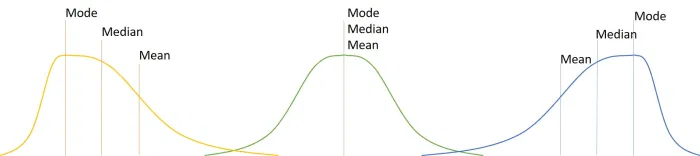

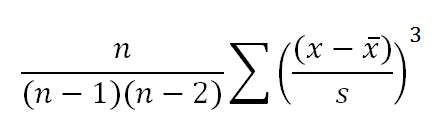

* In the formula, n is the number of samples, xm is the arithmetic mean of the array (sample mean), and 's' is its standard deviation.

* As the value of skewness moves towards plus infinity, the force of negative skewness increases as it moves towards positive and minus infinity.

Source for this explanation: https://teachtomachines.com/2020/07/07/log-donusumu-ile-carpiklik-giderme/

In [ ]:
dataset.agg(['skew', 'kurtosis']).transpose()

**Skewness code snippets taken from this notebook:** https://www.kaggle.com/rafetcan/heart-failure-modeling-skewness-97-5-acc

**Thank you to Rafet Can Kandar for his informative notebook.**

<a id = "21"></a>
## Carat

In [ ]:
sns.set_style('darkgrid')
sns.distplot(dataset["carat"], fit = norm)
plt.title('Skeweed')
plt.show()
(mu, sigma) = norm.fit(dataset["carat"])
print("mu {} : {}, sigma {} : {}".format("carat", mu, "carat", sigma))
print()

In [ ]:
dataset["carat"], lam = boxcox(dataset["carat"])

sns.set_style('darkgrid')
sns.distplot(dataset["carat"], fit = norm)
plt.title('Transformed')
plt.show()
(mu, sigma) = norm.fit(dataset["carat"])
print("mu {} : {}, sigma {} : {}".format("carat", mu, "carat", sigma))
print()

<a id = "22"></a>
## Price

In [ ]:
sns.set_style('darkgrid')
sns.distplot(dataset["price"], fit = norm)
plt.title('Skeweed')
plt.show()
(mu, sigma) = norm.fit(dataset["price"])
print("mu {} : {}, sigma {} : {}".format("price", mu, "price", sigma))
print()

In [ ]:
dataset["price"], lam = boxcox(dataset["price"])

sns.set_style('darkgrid')
sns.distplot(dataset["price"], fit = norm)
plt.title('Transformed')
plt.show()
(mu, sigma) = norm.fit(dataset["price"])
print("mu {} : {}, sigma {} : {}".format("price", mu, "price", sigma))
print()

<a id = "23"></a>
## y

In [ ]:
sns.set_style('darkgrid')
sns.distplot(dataset["y"], fit = norm)
plt.title('Skeweed')
plt.show()
(mu, sigma) = norm.fit(dataset["y"])
print("mu {} : {}, sigma {} : {}".format("y", mu, "y", sigma))
print()

In [ ]:
dataset["y"], lam = boxcox(dataset["y"])

sns.set_style('darkgrid')
sns.distplot(dataset["y"], fit = norm)
plt.title('Transformed')
plt.show()
(mu, sigma) = norm.fit(dataset["y"])
print("mu {} : {}, sigma {} : {}".format("y", mu, "y", sigma))
print()

<a id = "24"></a>
## z

In [ ]:
sns.set_style('darkgrid')
sns.distplot(dataset["z"], fit = norm)
plt.title('Skeweed')
plt.show()
(mu, sigma) = norm.fit(dataset["z"])
print("mu {} : {}, sigma {} : {}".format("z", mu, "z", sigma))
print()

In [ ]:
dataset["z"], lam = boxcox(dataset["z"])

sns.set_style('darkgrid')
sns.distplot(dataset["z"], fit = norm)
plt.title('Transformed')
plt.show()
(mu, sigma) = norm.fit(dataset["z"])
print("mu {} : {}, sigma {} : {}".format("z", mu, "z", sigma))
print()

In [ ]:
dataset.agg(['skew','kurtosis']).transpose()

<a id = "25"></a>
# Correlation

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = 2)
plt.show()

<a id = "26"></a>
# One-Hot Encoding

There are more than 2 unique values for each feature. So, One-Hot Encoding will be more useful than Label Encoding. Label Encoding can be cause of overfitting.

In [ ]:
cat_var =  ['cut', 'color', 'clarity']

for i in range (0, len(cat_var)):
    print(f'Unique Values for {cat_var[i]}', dataset[f'{cat_var[i]}'].unique())

In [ ]:
onehotencoder = OneHotEncoder()

In [ ]:
one_hot = ['cut', 'color', 'clarity']

for i in range(0, len(one_hot)):
    dataset[f'{one_hot[i]}'] = pd.Categorical(dataset[f'{one_hot[i]}'])
    dummies = pd.get_dummies(dataset[f'{one_hot[i]}'], prefix = f'{one_hot[i]}_encoded')
    dataset.drop([f'{one_hot[i]}'], axis=1, inplace=True)
    dataset = pd.concat([dataset, dummies], axis=1)

In [ ]:
dataset

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=False, cmap='Dark2_r', linewidths = 2)
plt.show()

<a id = "27"></a>
# Train-Test Split

In [ ]:
X = dataset.drop(["price"],axis =1)
y = dataset["price"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 101)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

In [ ]:
sc=StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

<a id = "28"></a>
# Linear Regression

<a id = "29"></a>
## Hyper-Parameter Optimization

In [ ]:
LinearRegression().get_params().keys()

In [ ]:
parameters = {'fit_intercept': ['True', 'False'],
              'normalize': ['True', 'False'],
             'copy_X': ['True', 'False'],
             'positive': ['True', 'False'],
             }

gcv = GridSearchCV(LinearRegression(), parameters, cv=15, verbose = 1, n_jobs = -1).fit(X_train, y_train)
print(f'GridSearchView Best Score: {gcv.best_score_*100}')
print(f'GridSearchView Best Estimator: {gcv.best_estimator_}')
print(f'GridSearchView Best Params: {gcv.best_params_}')

<a id = "30"></a>
## Model

In [ ]:
model = LinearRegression(copy_X='True', fit_intercept='True', normalize='True', positive='True', n_jobs = -1)
model.fit(X_train, y_train)
pred = model.predict(X_test)
 
train_score = model.score(X_train, y_train)
print(f'Train score of trained model: {train_score*100}')

test_score = model.score(X_test, y_test)
print(f'Test score of trained model: {test_score*100}')

In [ ]:
sns.set_theme(style="white")
sns.jointplot(x=y_test, y=pred, kind='reg', line_kws={"color": "red"})

<a id = "31"></a>
## Evaluation Metrics

**Note: Some of explanations taken from Scikit-Learn library's documentation. You can visit this address to if you want to know more about evaluation metrics about classification, clustering and regression.**

https://scikit-learn.org/stable/modules/model_evaluation.html

<a id = "32"></a>
### Explained Variance

* Explained variance regression score function.

* Best possible score is 1.0, lower values are worse.

If \hat{y} is the estimated target output, y the corresponding (correct) target output, and Var is Variance, the square of the standard deviation, then the explained variance is estimated as follow:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>e</mi>
  <mi>x</mi>
  <mi>p</mi>
  <mi>l</mi>
  <mi>a</mi>
  <mi>i</mi>
  <mi>n</mi>
  <mi>e</mi>
  <mi>d</mi>
  <mi mathvariant="normal">_</mi>
  <mrow></mrow>
  <mi>v</mi>
  <mi>a</mi>
  <mi>r</mi>
  <mi>i</mi>
  <mi>a</mi>
  <mi>n</mi>
  <mi>c</mi>
  <mi>e</mi>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow>
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mn>1</mn>
  <mo>&#x2212;</mo>
  <mfrac>
    <mrow>
      <mi>V</mi>
      <mi>a</mi>
      <mi>r</mi>
      <mo fence="false" stretchy="false">{</mo>
      <mi>y</mi>
      <mo>&#x2212;</mo>
      <mrow>
        <mover>
          <mi>y</mi>
          <mo stretchy="false">^</mo>
        </mover>
      </mrow>
      <mo fence="false" stretchy="false">}</mo>
    </mrow>
    <mrow>
      <mi>V</mi>
      <mi>a</mi>
      <mi>r</mi>
      <mo fence="false" stretchy="false">{</mo>
      <mi>y</mi>
      <mo fence="false" stretchy="false">}</mo>
    </mrow>
  </mfrac>
</math>

In [ ]:
print("Explained Variance:",metrics.explained_variance_score(y_test, pred))

<a id = "33"></a>
### Max Error

The max_error function computes the maximum residual error, a metric that captures the worst case error between the predicted value and the true value. In a perfectly fitted single output regression model, max_error would be 0 on the training set and though this would be highly unlikely in the real world, this metric shows the extent of error that the model had when it was fitted.

If yi is the predicted value of the i-th sample, and yi is the corresponding true value, then the max error is defined as:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>Max Error</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow>
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mi>m</mi>
  <mi>a</mi>
  <mi>x</mi>
  <mo stretchy="false">(</mo>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mrow>
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mrow>
    <mo stretchy="false">|</mo>
  </mrow>
  <mo stretchy="false">)</mo>
</math>

In [ ]:
print("Max Error:",metrics.max_error(y_test, pred))

<a id = "34"></a>
### Mean Squared Error

Mean Square Error (MSE) is the most commonly used regression loss function. MSE is the average loss of frames per sample across the entire dataset. To calculate the MSE, sum all frame losses for individual samples and then divide by the number of samples.

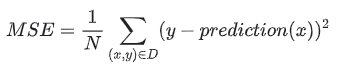

* x is the property the model uses to predict.
* The prediction (x) meaning is the predicted value according to the x property.
* y is the true value.
* N is the number of samples.

In [ ]:
print("Mean Squared Error:",metrics.mean_squared_error(y_test, pred))

<a id = "35"></a>
### Mean Absolute Error

Absolute error is the difference between estimated values and actual values. To be exact, it is the mean of the absolute value of each difference between the actual value and the predicted value for that sample across the entire sample of the data set.

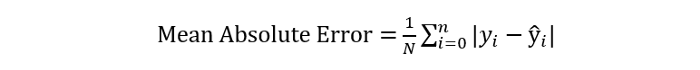

* y is the true value.
* y^ is the predicted value.

*A lower value indicates better accuracy.*

In [ ]:
print("Mean Absolute Error:",metrics.mean_absolute_error(y_test, pred))

<a id = "36"></a>
### Mean Absolute Percentage Error

In regression and time series models, mean absolute percent error is frequently used to measure the accuracy of predictions. If there are zero among the real values, the MAPE cannot be calculated as there will be division by zero. Percentage error cannot exceed 100% for very low predictive values, but there is no upper limit for the percentage error for very high predictive values. When MAPE is used to compare the accuracy of estimators, it is biased as it systematically selects a method that is too low for estimates. This small but serious problem can be overcome with an accuracy criterion that finds the ratio of predicted values to their true values. This approach leads to estimates that can be interpreted in terms of the geometric mean.

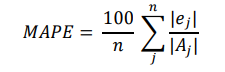

In [ ]:
print("Mean Absolute Percentage Error:",metrics.mean_absolute_percentage_error(y_test, pred))

<a id = "37"></a>
### Median Absolute Error

The median_absolute_error is particularly interesting because it is robust to outliers. The loss is calculated by taking the median of all absolute differences between the target and the prediction.

* Median absolute error regression loss.

* Median absolute error output is non-negative floating point. The best value is 0.0. 

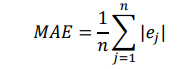

In [ ]:
print("Median Absolute Error:",metrics.median_absolute_error(y_test, pred))

<a id = "38"></a>
### R square

R² is a statistical measure of how close the data are to the fitted regression line. It is also known as the coefficient of determination or the multiple coefficient of determination for multiple regression. To put it in simpler language, R-square is a measure of fit for linear regression models.

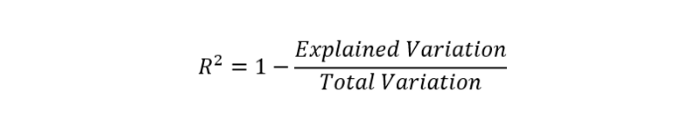

R-squared does not indicate whether a regression model fits your data adequately. A good model can have a low R-squared value. On the other hand, a biased model can have a high R-squared value!

In [ ]:
print("R^2:",metrics.r2_score(y_test, pred))

<a id = "39"></a>
### Adjusted R Squared

Each additional argument added to a model always increases the R² value.

As the independent variable is added, the model becomes more complex, when the model becomes complex, "overfitting" occurs. Hence R-squared increases.

Adjusted R-square comes into play to solve such problems. The adjusted R-square compensates for each independent variable and only increases when each given variable improves the model above what is possible.

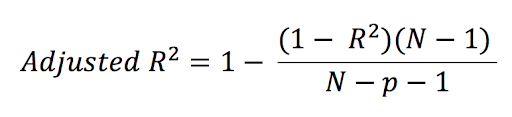

In [ ]:
n=X_test.shape[0]
p=X_test.shape[1] - 1
R2 = metrics.r2_score(y_test, pred)

adj_rsquared = 1 - (1 - R2) * ((n - 1)/(n-p-1))
print('Adjusted R Squared: {}'.format(adj_rsquared))

<a id = "40"></a>
### Root Mean Squared Error

It is a quadratic metric that measures the magnitude of the error, often used to find the distance between the predictor's predicted values and the actual values of a machine learning model. The standard deviation of the RMSE estimation errors (residues). That is, the residuals are a measure of how far the regression line is from the data points; RMSE is a measure of how far these residues spread. In other words, it tells you how dense that data is around the line that best fits the data. The RMSE value can range from 0 to infinity. Negative oriented scores, i.e. predictors with lower values, perform better. A zero RMSE value means the model made no mistakes. RMSE has the advantage of punishing large errors more so it may be better suited to some situations. RMSE prevents the unwanted use of absolute values in many mathematical calculations.

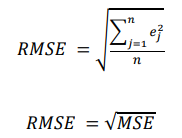

In [ ]:
print("Root Mean Squared Error:",np.sqrt(metrics.mean_squared_error(y_test, pred)))

<a id = "41"></a>
# Conclusion

I tried to explain a lot of things on this notebook.

* If you have questions, please comment them. I will try to explain if you don't understand.
* If you liked this notebook, please let me know :)

Thank you for your time.